In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Exploring Data

In [3]:
dataset=pd.read_csv("zomato.csv")
dataset.head(n=5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
dataset.shape

(51717, 17)

In [5]:
dataset.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
def analyze_columns(col,df):
        print("COLUMN NAME:",col)
        print("NUMBER OF UNIQUE VALUES:",df[col].nunique())
        print("DETAILS")
        print("UNIQUE_VALUES:",df[col].unique())
        #print(df[col].value_counts())
        print("*********************")
        
for col in dataset:
    analyze_columns(col,dataset)

COLUMN NAME: url
NUMBER OF UNIQUE VALUES: 51717
DETAILS
UNIQUE_VALUES: ['https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwxODM3NTQ3NCwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/SanchurroBangalore?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLDU5MDkwLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 ...
 'https://www.zomato.com/bangalore/plunge-sheraton-grand-bengaluru-whitefield-hotel-convention-centre-whitefield-bangalore?context=eyJzZSI6eyJlIjpbIjE4NjAyNDc4IiwiMTgyOTAwNTIiLCI1ODM1NCIsIjE4NzQxMTI5IiwxODY2MTA0MCwiMT

Data Cleaning

In [7]:
#DROPPING COLUMNS
dataset = dataset.drop(['url', 'menu_item', 'reviews_list','phone','address'], axis=1)

In [8]:
#Formating Rate Column to remove '/' and converting to float
dataset['rate'] = dataset['rate'].str.split('/').str[0]
dataset = dataset[(dataset['rate'] != 'NEW') & (dataset['rate'] != '-')]
dataset.dropna(subset=['rate'], inplace=True)
dataset['rate'] = dataset['rate'].astype(float)

In [9]:
#Formating 'approx_cost(for two people)' to remove ',' and converting to float
dataset['approx_cost(for two people)'] = pd.to_numeric(dataset['approx_cost(for two people)'], errors='coerce')
mean_cost = dataset['approx_cost(for two people)'].mean()
dataset.fillna({'approx_cost(for two people)':mean_cost},inplace=True)

In [10]:
dataset.dropna(subset=['rest_type'], inplace=True)
dataset.dropna(subset=['cuisines'], inplace=True)

In [11]:
dataset.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Research Question 1:
What is the relationship between restaurant features (online_order, book_table) and customer ratings/votes?

In [12]:
online_votes = dataset.groupby('online_order')['votes'].agg([
        'mean', 'count'
    ]).round(2)
booking_votes = dataset.groupby('book_table')['votes'].agg([
        'mean', 'count'
    ]).round(2)
    
print("Average Votes by Online Ordering:")
print(online_votes)
print("Average Votes by Table Booking:")
print(booking_votes)

Average Votes by Online Ordering:
                mean  count
online_order               
No            368.55  14403
Yes           344.15  27102
Average Votes by Table Booking:
               mean  count
book_table                
No           205.99  35201
Yes         1171.34   6304


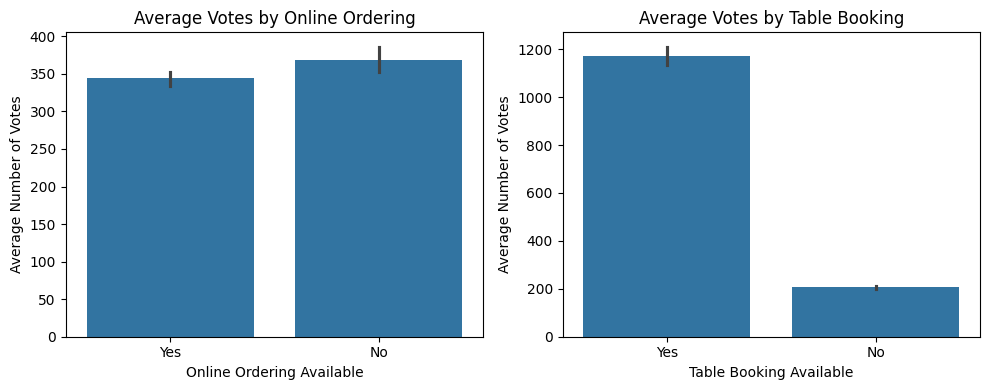

In [13]:
plt.figure(figsize=(10, 4))
    
    # Plot for online ordering
plt.subplot(1, 2, 1)
sns.barplot(x='online_order', y='votes', data=dataset)
plt.title('Average Votes by Online Ordering')
plt.xlabel('Online Ordering Available')
plt.ylabel('Average Number of Votes')
    
    # Plot for table booking
plt.subplot(1, 2, 2)
sns.barplot(x='book_table', y='votes', data=dataset)
plt.title('Average Votes by Table Booking')
plt.xlabel('Table Booking Available')
plt.ylabel('Average Number of Votes')
    
plt.tight_layout()
plt.show()

<div>RQ1 Findings:<div>

<div>1) Restaurants having table bookings have much higher votes than restaurants without <div>
<div>2) Online ordering doesnt impact votes as much as table bookings do<div>

<div>Research Question 2:<div>
<div>How does the average cost (for two people) differ between specialized and fusion restaurants?<div>
Does this cost difference vary across different cities?

In [14]:
dataset_cuisines=dataset.copy()
dataset_cuisines['cuisine_count'] = dataset_cuisines['cuisines'].str.count(',') + 1

In [15]:
d=dataset_cuisines.groupby('cuisine_count')['approx_cost(for two people)'].mean()

<Axes: xlabel='cuisine_count', ylabel='approx_cost(for two people)'>

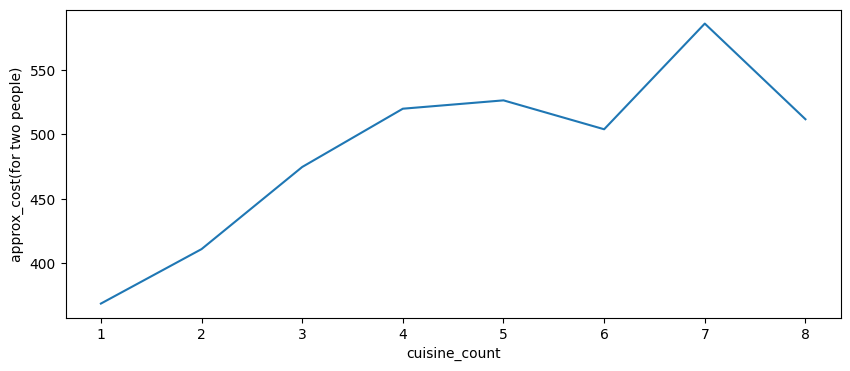

In [16]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=d)

This Plot shows that the price gradually increases as the number of cuisines increase until it reaches about 5 , where it shows some fluctuations

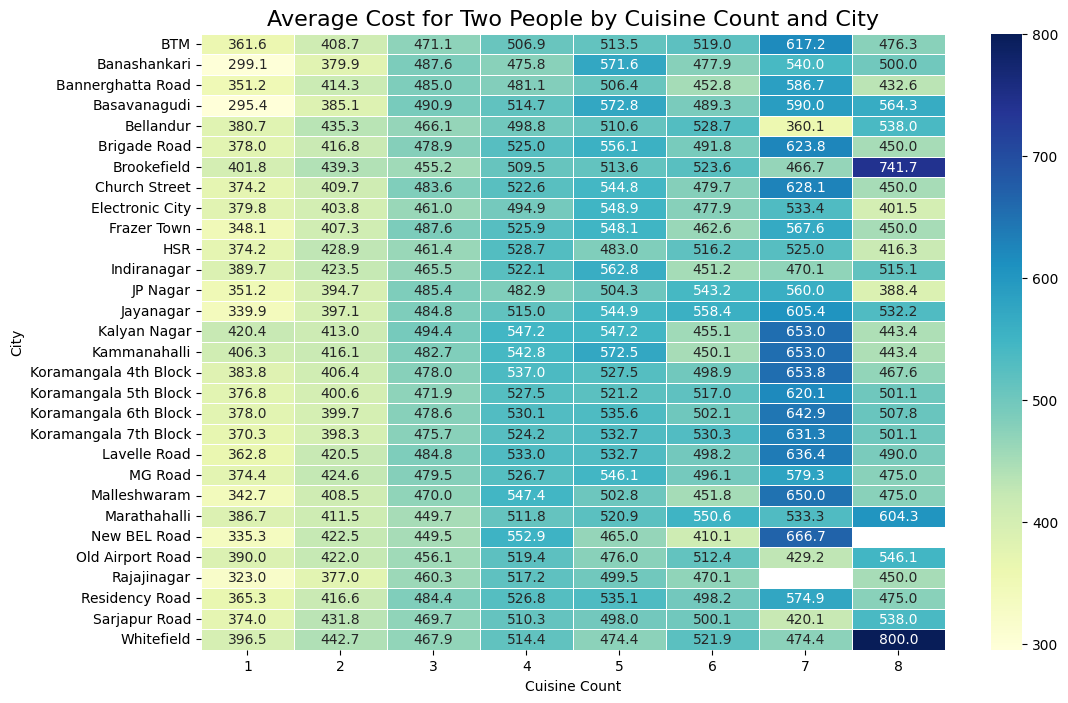

In [17]:

city_costs = dataset_cuisines.groupby(['listed_in(city)', 'cuisine_count'])['approx_cost(for two people)'].mean().reset_index()

city_costs_pivot = city_costs.pivot(index='listed_in(city)', columns='cuisine_count', values='approx_cost(for two people)')

plt.figure(figsize=(12, 8))
sns.heatmap(city_costs_pivot, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5)

plt.title('Average Cost for Two People by Cuisine Count and City', fontsize=16)
plt.xlabel('Cuisine Count')
plt.ylabel('City')
plt.show()


This plot shows avg cost for 2 people across differnt cities and cuisine count

Research Question 3:
                    What factors (cuisine type, cost, or restaurant type) most significantly influence popularity (votes) of a restaurant?

C:\Users\mooma\AppData\Local\Temp\ipykernel_10904\272402265.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')


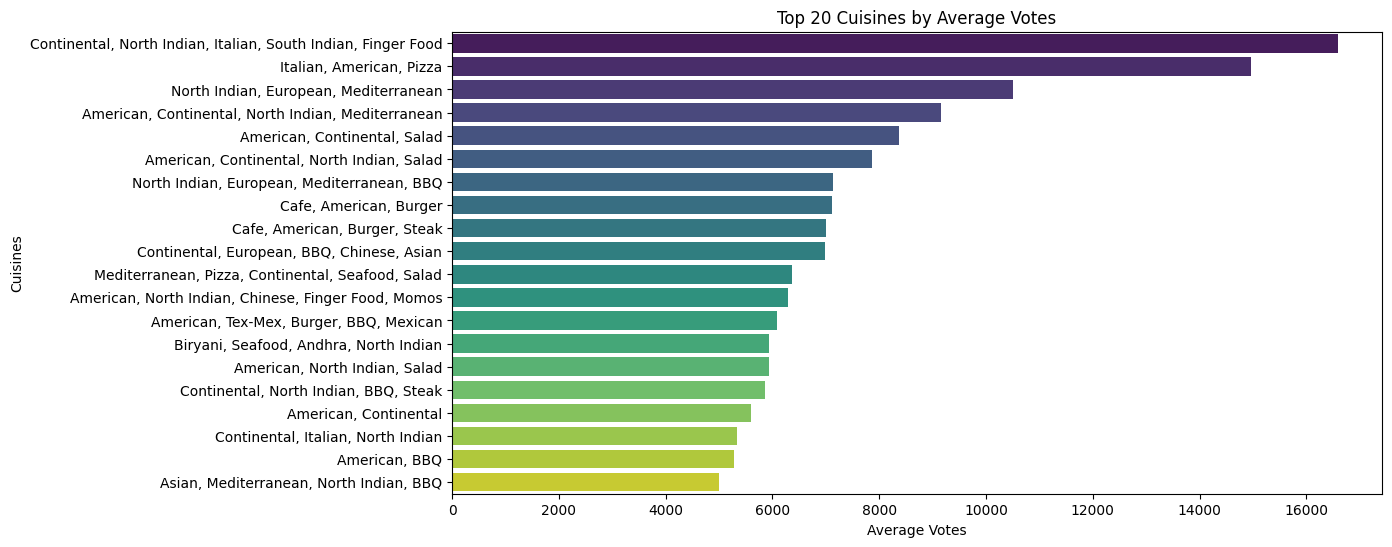

C:\Users\mooma\AppData\Local\Temp\ipykernel_10904\272402265.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cost_votes.values, y=cost_votes.index, palette='viridis', orient='h')


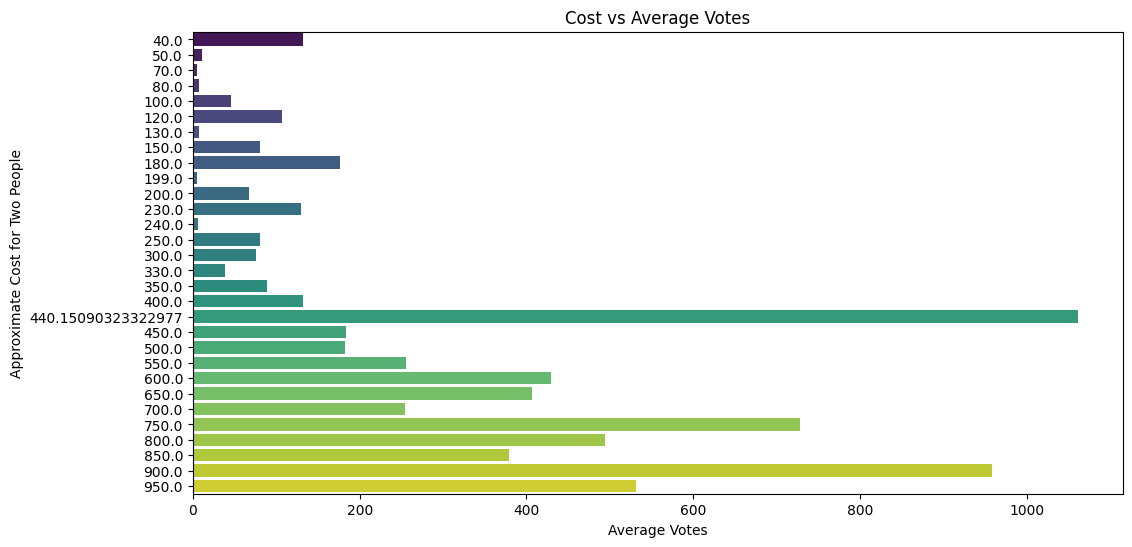

C:\Users\mooma\AppData\Local\Temp\ipykernel_10904\272402265.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rest_type_votes.values, y=rest_type_votes.index, palette='viridis')


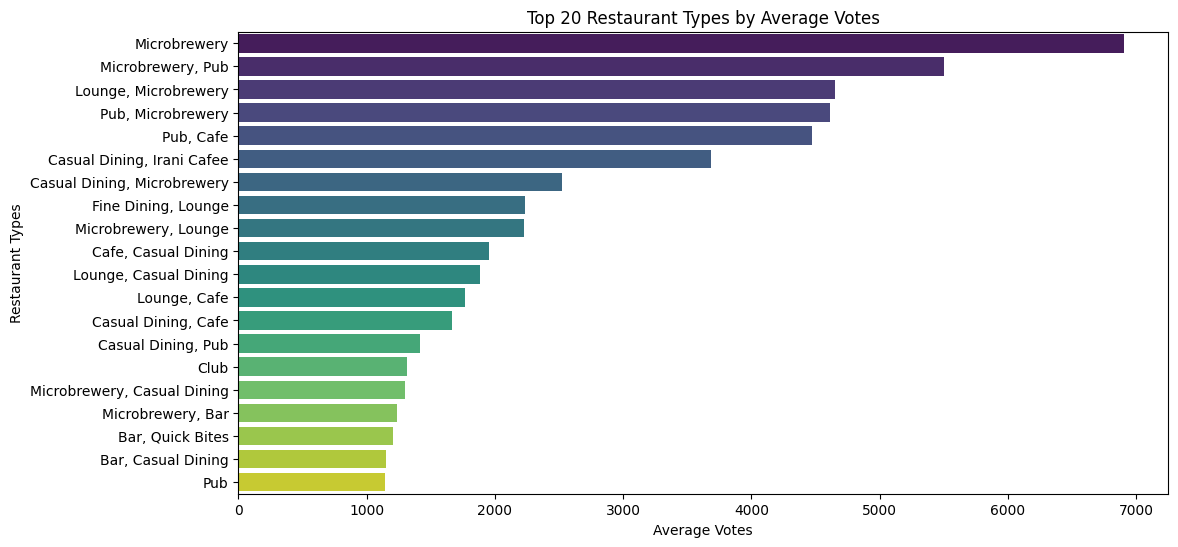

In [18]:
# Plotting the relationship between cuisine type and votes
plt.figure(figsize=(12, 6))
top_cuisines = dataset_cuisines.groupby('cuisines')['votes'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 20 Cuisines by Average Votes')
plt.xlabel('Average Votes')
plt.ylabel('Cuisines')
plt.show()

# Plotting the relationship between cost and votes
plt.figure(figsize=(12, 6))
cost_votes = dataset.groupby('approx_cost(for two people)')['votes'].mean().sort_values(ascending=False)
sns.barplot(x=cost_votes.values, y=cost_votes.index, palette='viridis', orient='h')
plt.title('Cost vs Average Votes')
plt.xlabel('Average Votes')
plt.ylabel('Approximate Cost for Two People')
plt.show()

# Plotting the relationship between restaurant type and votes
plt.figure(figsize=(12, 6))
rest_type_votes = dataset.groupby('rest_type')['votes'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=rest_type_votes.values, y=rest_type_votes.index, palette='viridis')
plt.title('Top 20 Restaurant Types by Average Votes')
plt.xlabel('Average Votes')
plt.ylabel('Restaurant Types')
plt.show()

Research question 2:How does the geographical distribution of restaurants (location) correlate with their cuisine diversity and price points, and what does this reveal about neighborhood dining preferences?"

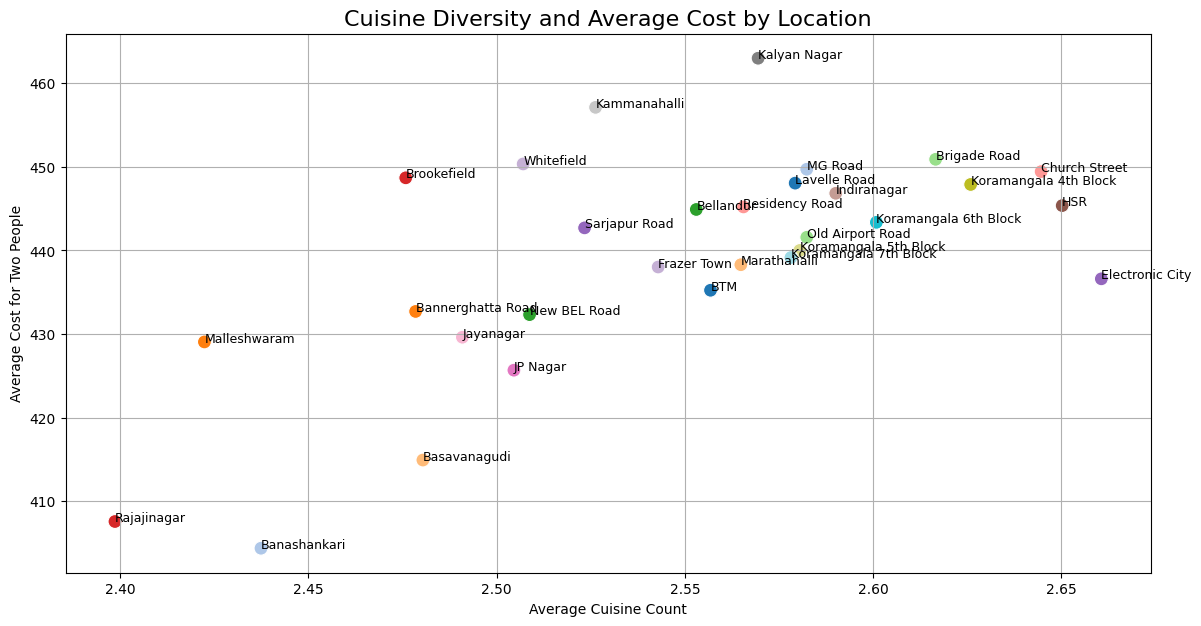

In [ ]:
# # Grouping the dataset by location and calculating the mean cost and cuisine count
# location_stats = dataset_cuisines.groupby('listed_in(city)').agg({
#     'approx_cost(for two people)': 'mean',
#     'cuisine_count': 'mean'
# }).reset_index()

# # Plotting the relationship between location, cuisine diversity, and price points
# plt.figure(figsize=(14, 7))

# # Scatter plot for average cost and cuisine count by location
# sns.scatterplot(data=location_stats, x='cuisine_count', y='approx_cost(for two people)', hue='listed_in(city)', palette='tab20', s=100, legend=False)

# # Adding labels and title
# for i in range(location_stats.shape[0]):
#     plt.text(location_stats.cuisine_count[i], location_stats['approx_cost(for two people)'][i], location_stats['listed_in(city)'][i], fontsize=9)

# plt.title('Cuisine Diversity and Average Cost by Location', fontsize=16)
# plt.xlabel('Average Cuisine Count')
# plt.ylabel('Average Cost for Two People')
# plt.grid(True)
# plt.show()

C:\Users\mooma\AppData\Local\Temp\ipykernel_10904\2051247041.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_stats, x='listed_in(city)', y='approx_cost(for two people)', palette='tab20')
C:\Users\mooma\AppData\Local\Temp\ipykernel_10904\2051247041.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_stats, x='listed_in(city)', y='cuisine_count', palette='tab20')


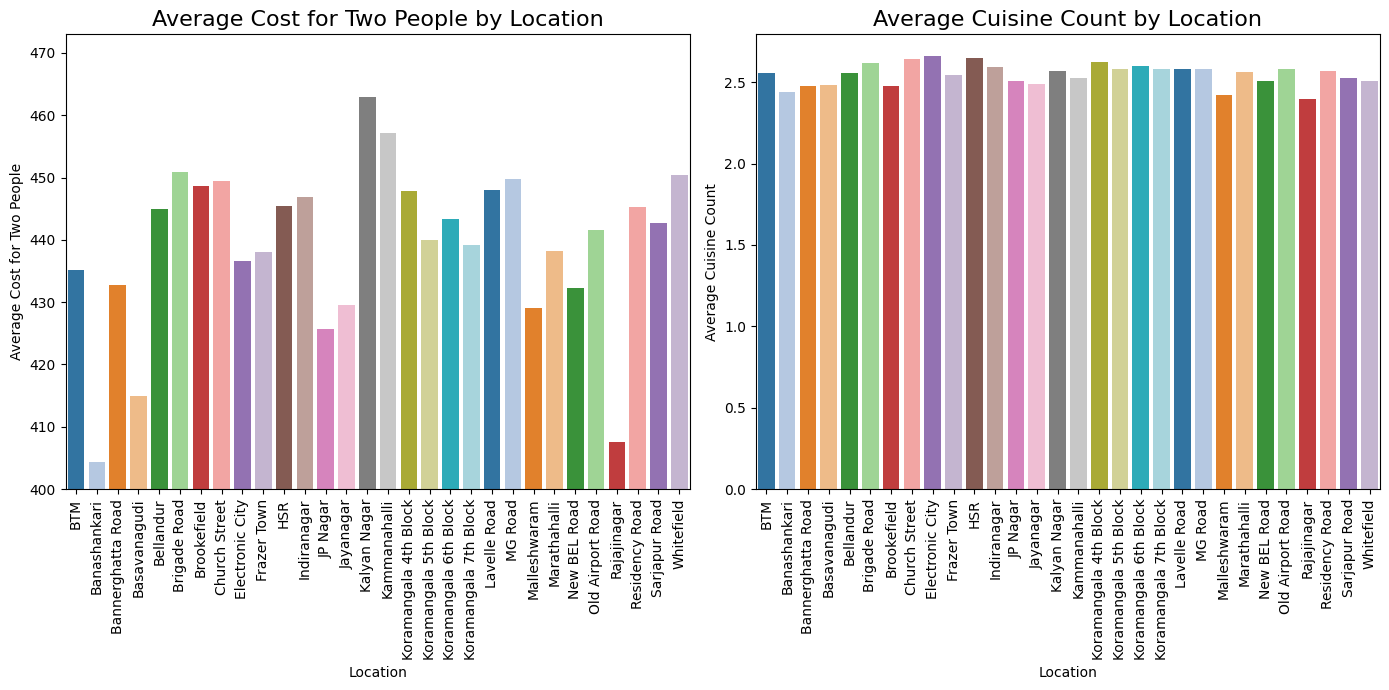

In [21]:
location_stats = dataset_cuisines.groupby('listed_in(city)').agg({
    'approx_cost(for two people)': 'mean',
    'cuisine_count': 'mean'
}).reset_index()

# Plotting the relationship between location and average cost
plt.figure(figsize=(14, 7))

# Bar plot for average cost by location
plt.subplot(1, 2, 1)
sns.barplot(data=location_stats, x='listed_in(city)', y='approx_cost(for two people)', palette='tab20')
plt.xticks(rotation=90)
plt.ylim(400, location_stats['approx_cost(for two people)'].max() + 10)
plt.title('Average Cost for Two People by Location', fontsize=16)
plt.xlabel('Location')
plt.ylabel('Average Cost for Two People')

# Plotting the relationship between location and cuisine count
plt.subplot(1, 2, 2)
sns.barplot(data=location_stats, x='listed_in(city)', y='cuisine_count', palette='tab20')
plt.xticks(rotation=90)
plt.title('Average Cuisine Count by Location', fontsize=16)
plt.xlabel('Location')
plt.ylabel('Average Cuisine Count')

plt.tight_layout()
plt.show()

Research question 1 :findings:cuisine's type has the most effect on Votes


Research question 2 :findings:dining costs vary significantly by location, the availability of different cuisines is relatively standardized across the city.